### Importing Packages
importing libraries for data processing, visualization and manipulation

In [42]:
import pandas as pd
import seaborn as sns
import  numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Reading Data
Reading data from local directory

In [41]:
df = pd.read_csv("data602_exam.csv")

### Data has Rows=4999 and Columns=1805

In [3]:
df.shape

(4999, 1805)

### Below we can see the Statistical info about the data

In [4]:
df.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


### We can see some of the features in the data sets

In [5]:
df.columns

Index(['Virtual', 'Offset', 'loc', 'Import', 'Imports', 'var', 'Forwarder',
       'UINT', 'LONG', 'BOOL',
       ...
       'Img99', 'Img100', 'Img101', 'Img102', 'Img103', 'Img104', 'Img105',
       'Img106', 'Img107', 'target'],
      dtype='object', length=1805)

### The dataset has only Numeric Features

In [6]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

### We can see that there is no null values present in the data


In [7]:
df.isna().sum().sum()

0

### As there are multiple columns it is difficult to get info using corr plot.

<AxesSubplot:>

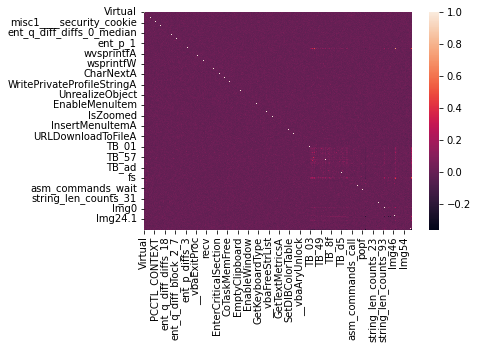

In [8]:
sns.heatmap(df.corr())

### Split data for further Modeling

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns = ['target'])
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

### Looking at the distribution of EDX registry Vs malware
Where distibution seems even

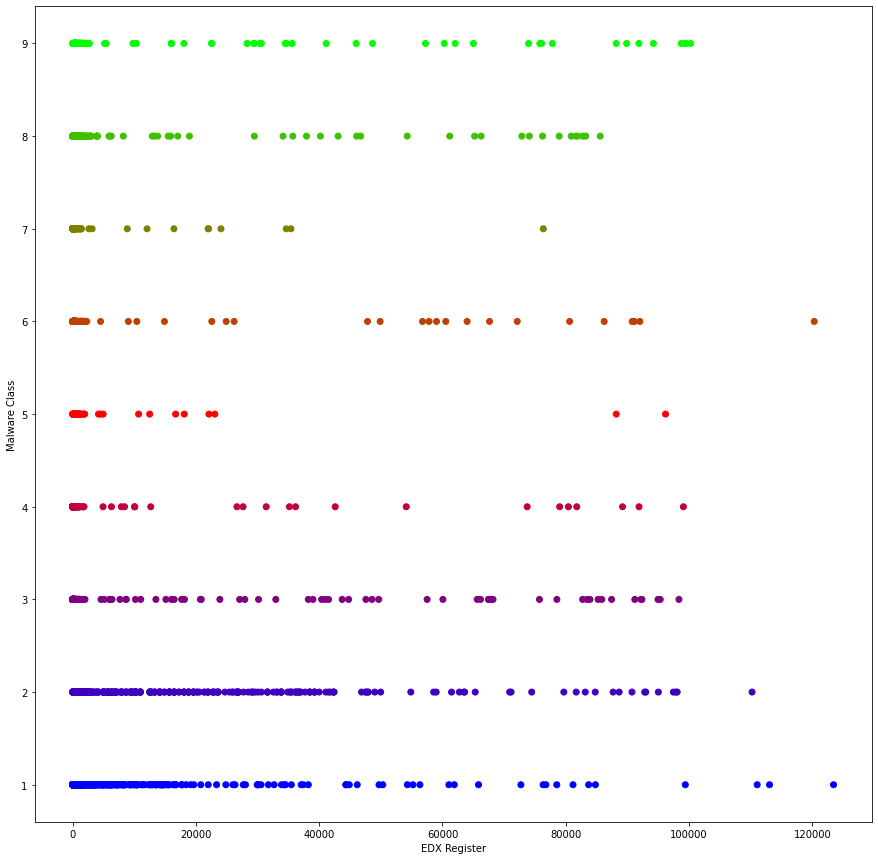

In [11]:
plt.figure(figsize=(15,15))
plt.xlabel("EDX Register")
plt.ylabel("Malware Class")
xa = np.array(X['edx'])
xb = np.array(X['esi'])
ya = np.array(Y)
plt.scatter(xa,ya,c=ya,cmap='brg')


# Lets create multiple model which fits the best

# Logistic Regression

## As we can see below if we directly inject data to the model it gives poor result

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  53.0


## Here is how I have observed the features
<b>keywords</b> = ```['Virtual', 'Offset', 'loc', 'Import', 'Imports', 'var', 'Forwarder', 'UINT', 'LONG', 'BOOL', 'WORD',
            'BYTES', 'large', 'short', 'dd', 'db', 'dw', 'XREF', 'ptr', 'DATA', 'FUNCTION', 'extrn', 'byte', 'word',
            'dword', 'char', 'DWORD', 'stdcall', 'arg', 'locret', 'asc', 'align', 'WinMain', 'unk', 'cookie', 'off',
            'nullsub', 'DllEntryPoint', 'System32', 'dll', 'CHUNK', 'BASS', 'HMENU', 'DLL', 'LPWSTR', 'void', 'HRESULT',
            'HDC', 'LRESULT', 'HANDLE', 'HWND', 'LPSTR', 'int', 'HLOCAL', 'FARPROC', 'ATOM', 'HMODULE', 'WPARAM',
            'HGLOBAL', 'entry', 'rva', 'COLLAPSED', 'config', 'exe', 'Software', 'CurrentVersion', '__imp_', 'INT_PTR',
            'UINT_PTR', '---Seperator', 'PCCTL_CONTEXT', '__IMPORT_', 'INTERNET_STATUS_CALLBACK', '.rdata:', '.data:',
            '.text:', 'case', 'installdir', 'market', 'microsoft', 'policies', 'proc', 'scrollwindow', 'search', 'trap',
            'visualc', '___security_cookie', 'assume', 'callvirtualalloc', 'exportedentry', 'hardware',
            'hkey_current_user', 'hkey_local_machine', 'sp-analysisfailed', 'unableto']```

<b>registers</b> = ```['edx', 'esi', 'es', 'fs', 'ds', 'ss', 'gs', 'cs', 'ah', 'al',
             'ax', 'bh', 'bl', 'bx', 'ch', 'cl', 'cx', 'dh', 'dl', 'dx',
             'eax', 'ebp', 'ebx', 'ecx', 'edi', 'esp']```

<b>opcodes</b> = ```['add', 'al', 'bt', 'call', 'cdq', 'cld', 'cli', 'cmc', 'cmp', 'const', 'cwd', 'daa', 'db'
    , 'dd', 'dec', 'dw', 'endp', 'ends', 'faddp', 'fchs', 'fdiv', 'fdivp', 'fdivr', 'fild'
    , 'fistp', 'fld', 'fstcw', 'fstcwimul', 'fstp', 'fword', 'fxch', 'imul', 'in', 'inc'
    , 'ins', 'int', 'jb', 'je', 'jg', 'jge', 'jl', 'jmp', 'jnb', 'jno', 'jnz', 'jo', 'jz'
    , 'lea', 'loope', 'mov', 'movzx', 'mul', 'near', 'neg', 'not', 'or', 'out', 'outs'
    , 'pop', 'popf', 'proc', 'push', 'pushf', 'rcl', 'rcr', 'rdtsc', 'rep', 'ret', 'retn'
    , 'rol', 'ror', 'sal', 'sar', 'sbb', 'scas', 'setb', 'setle', 'setnle', 'setnz'
    , 'setz', 'shl', 'shld', 'shr', 'sidt', 'stc', 'std', 'sti', 'stos', 'sub', 'test'
    , 'wait', 'xchg', 'xor']```

## Features are the most important part of a model training as garbage in can result in garbage out.
## We are using Random Forest to get the best features using its Feature importance functionality.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# from sklearn.ensemble._forest import ForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [17]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [18]:
sel.get_support()


array([False, False, False, ..., False,  True,  True])

In [19]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

448

In [20]:
print(selected_feat)

Index(['Import', 'Imports', 'var', 'BOOL', 'BYTES', 'short', 'dd', 'db',
       'XREF', 'ptr',
       ...
       'Img50', 'Img51', 'line_count_asm', 'size_asm', 'Plus', 'Bracket_Open',
       'ExtendedAscii', 'Img0.1', 'Img106', 'Img107'],
      dtype='object', length=448)


In [21]:
sel

SelectFromModel(estimator=RandomForestClassifier())

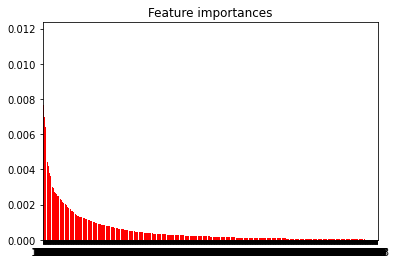

In [22]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Using the `SelectFromModel` funciton we have extracted 448 features outof 1805.

In [45]:
selected_feat

Index(['Import', 'Imports', 'var', 'BOOL', 'BYTES', 'short', 'dd', 'db',
       'XREF', 'ptr',
       ...
       'Img50', 'Img51', 'line_count_asm', 'size_asm', 'Plus', 'Bracket_Open',
       'ExtendedAscii', 'Img0.1', 'Img106', 'Img107'],
      dtype='object', length=448)

In [23]:
df2 = df[selected_feat]
X = df2
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Here we can see that the Accuracy has increase but not that drastic, lets use more complex models

In [26]:
print("Accuracy: ", classifier.score(X_test, y_test) * 100)

Accuracy:  53.53333333333333


In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[113  17  10  22   3   9   7  32   6]
 [ 23 199  11  14   5  17   6  16  30]
 [ 15   9 316  21   7  10  18   5   7]
 [  9   6   6  15   1   7   1  20   7]
 [  4   1   7   0   0   2   3   4   1]
 [ 13   9   9  11   1  30   3  17  24]
 [  6   1   8   1   0   3  22   6   4]
 [ 18  12   9  11   3  19   9  49  13]
 [ 16  19   2  11   3  10   7  20  59]]


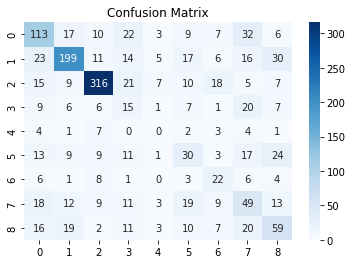

In [29]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## RandomForest
### Advantages :
1) Its advantages over using a single decision tree are <br>
    a) Random forest overcomes overfitting by averaging or combining the results of different decision trees.<br>
    b) Random forest has less variance than a single decision tree and hence can work well for a larger range of data items than a single decision tree.

2. Random forests are extremely flexible and have very high accuracy.

3. Minimal preparation of the input data is required. 
    a. You do not have to scale the data.
    b. It also maintains accuracy even when a large proportion of the data are missing.

### Disadvantages:
1) Complexity <br>
</t> a) Modelling and prediction are both more time consuming than decision trees.<br>
</t> b) Difficult to understand the relationship between data features as it is a large collection of decision trees.

### Control for overfitting:
1)Using more trees as defined via the n_estimators. The more trees we try, the less likely it is to overfit.<br>
2)Using less features as defined via max_features which would allow a more general model to surface. Since we have 30 features, using no more than 20 would allow a more generalitic model to be created and hence allowing less overfitting.<br>
3)Using smaller values of max_depth would also reduce overfitting.<br>
4)The model performance was evaluated using an external dataset (a dataset that was not used for training).

In [30]:
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #To evaluate our model

from sklearn.model_selection import GridSearchCV

# We would be only trying random forest and GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder


df2 = df[selected_feat]
X = df2
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


## Lets work on finding the best combination of hyper parameters <br> using Grid Search and Cross Validation

In [31]:
%%time
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.3s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=10;

[CV 3/5] END max_depth=3, max_features=20, n_estimators=3;, score=nan total time=   0.2s
[CV 4/5] END max_depth=3, max_features=20, n_estimators=3;, score=nan total time=   0.1s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=5;, score=nan total time=   0.1s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=5;, score=nan total time=   0.1s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=5;, score=nan total time=   0.1s
[CV 4/5] END max_depth=3, max_features=20, n_estimators=5;, score=nan total time=   0.1s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=5;, score=nan total time=   0.2s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.3s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.4s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.5s
[CV 4/5] END max_d

[CV 5/5] END max_depth=5, max_features=15, n_estimators=3;, score=nan total time=   0.1s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=5;, score=nan total time=   0.2s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=5;, score=nan total time=   0.2s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=5;, score=nan total time=   0.1s
[CV 4/5] END max_depth=5, max_features=15, n_estimators=5;, score=nan total time=   0.2s
[CV 5/5] END max_depth=5, max_features=15, n_estimators=5;, score=nan total time=   0.2s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=10;, score=nan total time=   0.4s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=10;, score=nan total time=   0.4s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=10;, score=nan total time=   0.4s
[CV 4/5] END max_depth=5, max_features=15, n_estimators=10;, score=nan total time=   0.4s
[CV 5/5] END max_depth=5, max_features=15, n_estimators=10;, score=nan total time=   0.4s
[CV 1/5] END max

[CV 3/5] END max_depth=7, max_features=7, n_estimators=5;, score=nan total time=   0.1s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=5;, score=nan total time=   0.1s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=5;, score=nan total time=   0.1s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.2s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.2s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.2s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.2s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=10;, score=nan total time=   0.2s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.5s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.6s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=25;, score=nan total time=   0.5s
[CV 4/5] END max_depth=7

[CV 2/5] END max_depth=10, max_features=4, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=25;, score=nan total time=   0.1s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=25;, score=nan total time=   0.1s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=25;, score=nan total time=   0.1s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=25;, score=nan total time=   0.1s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=25;, score=nan total time=   0.1s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=50;, score=nan total time=   0.3s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=50;, score=nan total time=   0.3s
[CV 3/5] E

[CV 3/5] END max_depth=10, max_features=20, n_estimators=10;, score=nan total time=   0.2s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=10;, score=nan total time=   0.2s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=10;, score=nan total time=   0.2s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.6s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.6s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.6s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.6s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.6s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   1.3s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   1.3s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   1.3s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [32]:
print(grid_search.best_score_) #Print the best recall
print(grid_search.best_params_) #Print the best parameter

nan
{'max_depth': 3, 'max_features': 4, 'n_estimators': 3}


In [33]:
#use the best params above to create a random forest classifier
rf = RandomForestClassifier(max_depth=grid_search.best_params_.get('max_depth'), max_features=grid_search.best_params_.get('max_features'), 
                            n_estimators=grid_search.best_params_.get('n_estimators'), random_state=2)

#training with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=3,
                       random_state=2)

## After training using Random Forest We can observe that the Accuracy and Recall has increased.
## RF was an Ensemble model

In [34]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Performance of the model
print(accuracy_score(y_test,y_pred))
print("\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_test, y_pred))

0.6693333333333333


Predicted    1    2    3    8   9   All
True                                   
1          157   29   11    4   3   204
2           11  314    4    8   2   339
3            2    2  384    4   4   396
4           44    7    5   11   2    69
5            9    5    3    4   0    21
6           72    4    7   11  17   111
7            9    3    1   33   4    50
8           30   10    5  119   7   171
9           75   23    7    4  30   139
All        409  397  427  198  69  1500


              precision    recall  f1-score   support

           1       0.38      0.77      0.51       204
           2       0.79      0.93      0.85       339
           3       0.90      0.97      0.93       396
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00       111
           7       0.00      0.00      0.00        50
           8       0.60      0.70      0.64       171
          

Text(0.5, 0, 'Relative Importance')

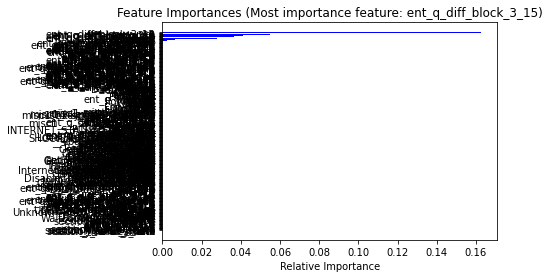

In [35]:
#Plot the features in terms of decreasing importances highlighting the most important feature
importances = rf.feature_importances_
indices = np.argsort(importances)

features=df.columns

plt.figure(1)
plt.title('Feature Importances (Most importance feature: '+features[indices][len(indices)-1]+')')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [36]:
indices[:10]

array([  0, 303, 302, 301, 300, 299, 298, 297, 295, 294], dtype=int64)

## XGBoost
### Advantages :
1) Its advantages of Boosting <br>
    a) XGB overcomes overfitting by averaging or combining the results of different trees.<br>
    b) It Trains on weak classifiers, hence gives great accuracy

2. XGB are extremely flexible and have very high accuracy.

3. Minimal preparation of the input data is required. 
    a. You do not have to scale the data.
    b. It also maintains accuracy even when a large proportion of the data are missing.

### Disadvantages:
1) Complexity <br>
</t> a) Modelling and prediction are fast but preparing data when matrix is used is difficult.<br>
</t> b) Difficult to understand the relationship between data features as it is a large collection trees.

### Control for overfitting:
1)Using more trees as defined via the n_estimators. The more trees we try, the less likely it is to overfit.<br>
2)Using Lambda to avoid overfitting .<br>
3)Using smaller values of max_depth would also reduce overfitting.<br>
4)The model performance was evaluated using an external dataset (a dataset that was not used for training).

## Lets work with another type of Algorithm which is XGBoost. It is a combination of ensemble and Boosting to traning the weak learner's.

In [37]:
# Technique 2: Gradient Boosted Trees
from xgboost import XGBClassifier
model = XGBClassifier(reg_alpha=0, reg_lambda=1,gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3)

In [38]:
def compute_classification_error(y_true, y_hat):

    accuracy = accuracy_score(y_true, y_hat)

    scorecard = pd.DataFrame({'y_hat': y_hat, 'y_true': y_true})
    false_positives = scorecard[(scorecard['y_true'] == 0) & (scorecard['y_hat'] == 1)]
    false_negatives = scorecard[(scorecard['y_true'] == 1) & (scorecard['y_hat'] == 0)]
    type_1_error = len(false_positives)/len(scorecard)
    type_2_error = len(false_negatives)/len(scorecard)

    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Type I error rate: {:.5f}'.format(type_1_error *100.0))
    print('Type II error rate: {:.5f}'.format(type_2_error *100.0))

## We have got he Best result using XGBoost model as it traing on the weak learners.

In [39]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

compute_classification_error(y_true=y_test, y_hat=y_pred)

[01:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.27%
Type I error rate: 0.00000
Type II error rate: 0.00000


## Here we can see the Top Features Important for Modeling

In [40]:
# feature importance 
feature_importance = pd.DataFrame({'Feature': X.columns, 'Feature_importance': model.feature_importances_})
feature_importance.sort_values('Feature_importance', ascending=False).head()

,Feature,Feature_importance
75,ent_q_diff_diffs_1_median,0.138810
191,TB_06,0.063414
445,Img0.1,0.036175
369,Offset.1,0.034406
154,_except_handler3,0.031620


# Conclusion

 1) We did not perform normalization of the data which could improve the performance of the model as it would make every datapoint have the same scale so each feature is equally important.

 2) We did not derive additional features from the existing features which could be more predictive and further improve the model's performance for both Random Forest and XGB.

 3) We could have tried additional methods to further reduce the overfitting in the Random Forest model by specifying another tuning parmater, min_samples_leaf and setting a larger value for range of values to be tuned

 In summary, XGBoost is better at identifying the virus classes as it correctly identified than other models. 

    I has been also observed that due to more occurrance of '2' and '3' targets most predictions are done for those categories.